In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
sem1 = pd.read_csv("Sem1.csv")
sem2 = pd.read_csv("Sem2.csv")
sem3 = pd.read_csv("Sem3.csv")

In [130]:
sem1.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Concettina,1,27,84,45,19
1,2,Burl,1,63,24,24,8
2,3,Lebbie,1,93,80,75,51
3,4,Merci,1,72,68,8,41
4,5,Isak,1,37,99,79,26


In [131]:
sem2.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Kelcie,2,5,14,14,40
1,2,Mayer,2,3,80,71,48
2,3,Bondy,2,66,64,54,4
3,4,Muriel,2,11,37,98,10
4,5,Nickolaus,2,76,16,5,98


In [132]:
sem3.head()

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Parnell,3,100,31,58,87
1,2,Tad,3,48,17,77,50
2,3,Bunny,3,20,23,77,26
3,4,Demeter,3,80,88,40,100
4,5,Augustine,3,62,78,33,71


In [136]:
marksheet = pd.concat([sem1,sem2,sem3],axis=0)

In [137]:
marksheet

,ID,Name,Semester,Maths,English,Physics,Computer Science
0,1,Concettina,1,27,84,45,19
1,2,Burl,1,63,24,24,8
2,3,Lebbie,1,93,80,75,51
3,4,Merci,1,72,68,8,41
4,5,Isak,1,37,99,79,26
...,...,...,...,...,...,...,...
55,56,Chuck,3,50,91,58,47
56,57,Silvio,3,23,26,34,1
57,58,Matt,3,18,1,84,10
58,59,Erv,3,64,14,13,10


In [138]:
len(marksheet)

180

In [139]:
marksheet.drop("ID",axis=1,inplace=True)

In [140]:
from sklearn.utils import shuffle
marksheet = shuffle(marksheet)
marksheet.reset_index(drop=True, inplace=True)
marksheet

,Name,Semester,Maths,English,Physics,Computer Science
0,Manolo,1,2,3,67,31
1,Leigh,1,72,36,76,28
2,Matelda,3,14,41,31,16
3,Hersch,2,39,72,100,12
4,Mitch,1,83,97,99,73
...,...,...,...,...,...,...
175,Dani,3,82,33,72,88
176,Addia,3,9,49,2,52
177,Kendall,3,74,83,4,23
178,Kim,2,48,74,74,25


In [215]:
def calculation_marks(b,a):
    if b == "pass":
        if a in [1,2,3]:
            maths_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Maths >=30)]
            cs_pass = marksheet[(marksheet["Semester "] == a) & (marksheet["Computer Science"] >=30)]
            english_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.English >=30)]
            physics_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Physics >=30)]
        
        elif a == "full":
            maths_pass = marksheet[(marksheet.Maths >=30)]
            cs_pass = marksheet[(marksheet["Computer Science"] >=30)]
            english_pass = marksheet[(marksheet.English >=30)]
            physics_pass = marksheet[(marksheet.Physics >=30)]
    
    elif b == "fail":
        if a in [1,2,3]:
            maths_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Maths <30)]
            cs_pass = marksheet[(marksheet["Semester "] == a) & (marksheet["Computer Science"] <30)]
            english_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.English <30)]
            physics_pass = marksheet[(marksheet["Semester "] == a) & (marksheet.Physics <30)]
        
        elif a == "full":
            maths_pass = marksheet[(marksheet.Maths <30)]
            cs_pass = marksheet[(marksheet["Computer Science"] <30)]
            english_pass = marksheet[(marksheet.English <30)]
            physics_pass = marksheet[(marksheet.Physics <30)]

    

    return len(maths_pass),len(cs_pass),len(english_pass), len(physics_pass)


In [218]:
maths1, cs1, english1, physics1 = calculation_marks("pass",1)

In [219]:
maths2, cs2, english2, physics2 = calculation_marks("pass",2)

In [220]:
maths3, cs3, english3, physics3 = calculation_marks("pass",3)

In [221]:
maths_total, cs_total, english_total, physics_total = calculation_marks("pass","full")

In [226]:
maths_total_fail, cs_total_fail, english_total_fail, physics_total_fail = calculation_marks("fail","full")


In [227]:
maths_fail1, cs_fail1, english_fail1, physics_fail1 = calculation_marks("fail",1)


In [228]:
maths_fail2, cs_fail2, english_fail2, physics_fail2 = calculation_marks("fail",2)


In [229]:
maths_fail3, cs_fail3, english_fail3, physics_fail3 = calculation_marks("fail",3)


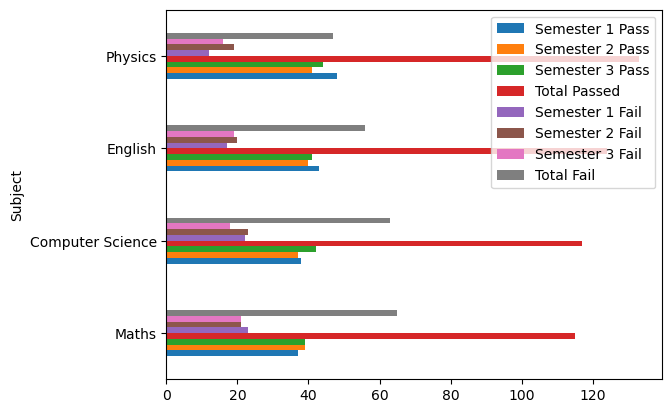

In [237]:
semester1 = [maths1,cs1,english1,physics1]
semester2  =[maths2,cs2,english2,physics2]
semester3 = [maths3,cs3,english3,physics3]
semester1_fail = [maths_fail1,cs_fail1,english_fail1,physics_fail1]
semester2_fail = [maths_fail2,cs_fail2,english_fail2,physics_fail2]
semester3_fail = [maths_fail3,cs_fail3,english_fail3,physics_fail3]
total_fail = [maths_total_fail,cs_total_fail,english_total_fail,physics_total_fail]
total_sem = [maths_total,cs_total,english_total,physics_total]
subjects = ["Maths","Computer Science","English","Physics"]
cols = ["Semester 1 Pass", "Semester 2 Pass","Semester 3 Pass","Total Passed","Semester 1 Fail","Semester 2 Fail", "Semester 3 Fail","Total Fail"]

df_total = pd.DataFrame([semester1,semester2,semester3,total_sem,semester1_fail,semester2_fail,semester3_fail,total_fail])

df_total = df_total.T
df_total.columns  = cols
df_total.index = subjects
df_total.index.rename("Subject",inplace=True)
df_total.plot.barh();